# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]



[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Introducción

> El presente informe tiene por objetivo analizar la rentabilidad individual generada por ambas tarifas y contrastarlas mediante pruebas estadísticas para evaluar la fiabilidad de nuestros resultados.

> Lo que se busca, es mostrar qué plan es el que está generando más ganancias, en qué condiciones de uso y de esta manera, saber donde destinar recursos en publicidad.


### Descripciones de los DataFrames Relevantes:

- **df_calls**: Contiene detalles de todas las llamadas realizadas, incluyendo usuario, fecha y duración. Esencial para evaluar el uso y los costos de llamada.

- **df_inet**: Registra el uso de datos de internet por sesión para cada usuario. Clave para entender el consumo de datos y los cargos por servicios adicionales.

- **df_plans**: Describe los planes de servicio disponibles, con detalles sobre límites de uso y precios. Fundamental para la comparación con el comportamiento de consumo y la estrategia de precios.

- **df_sms**: Datos sobre los mensajes de texto enviados por cada usuario. Útil para analizar el uso de mensajes y su impacto en los ingresos.

- **df_total_to_pay**: Calcula el total a pagar por cada usuario, basado en su consumo y plan. Proporciona una medida directa de los ingresos generados por usuario.

- **df_users**: Incluye información demográfica y de suscripción de los usuarios. Importante para análisis demográficos y de comportamiento de consumo.

- **total_data_use**: Vista agregada del uso de servicios, incluyendo llamadas, mensajes y datos. Crucial para una visión comprensiva del comportamiento del usuario y la identificación de oportunidades de ingresos.

## Inicialización

In [ ]:
# Cargar todas las librerías
import pandas as pd  # Para manejo de datos
import numpy as np  # Para cálculos numéricos
from scipy import stats as st  # Para estadísticas
import seaborn as sns  # Para visualización de datos
import matplotlib.pyplot as plt  # Para gráficos
import math # importa a math si usas ceil y floor

## Cargar datos

In [ ]:
# Carga los archivos de datos en diferentes DataFrames
try:
  df_calls = pd.read_csv("./datasets/megaline_calls.csv")
  df_inet  = pd.read_csv("./datasets/megaline_internet.csv")
  df_sms   = pd.read_csv("./datasets/megaline_messages.csv")
  df_plans = pd.read_csv("./datasets/megaline_plans.csv")
  df_users = pd.read_csv("./datasets/megaline_users.csv")

except Exception as e:
  print(f"Error: {e}")
  df_calls = pd.read_csv("megaline_calls.csv")
  df_inet  = pd.read_csv("megaline_internet.csv")
  df_sms   = pd.read_csv("megaline_messages.csv")
  df_plans = pd.read_csv("megaline_plans.csv")
  df_users = pd.read_csv("megaline_users.csv")


## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [ ]:
# Imprime una muestra de los datos para las tarifas
print(df_plans.head(10))

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Procedimiento**
> No hay datos ausentes o tipos de datos inapropiados que requieran corrección inmediata. Sin embargo, la consistencia y precisión en los cálculos son aspectos que deben ser cuidadosamente manejados en el análisis posterior.
>
>Según la descripción del proyecto, Megaline redondea los megabytes a gigabytes. Es importante asegurarse de que este redondeo se aplique correctamente en los cálculos.
>
> La columna `mb_per_month_included` está en megabytes, mientras que `usd_per_gb` está en gigabytes. Para consistencia y para evitar errores en cálculos futuros, convertiremos todo a la misma unidad -gigabytes- ya que los costos adicionales están en esa unidad. Para esto tomamos los valores de  `mb_per_month_included` y los dividimos por 1024 para convertirlos a gigabytes.
> Por esta vez, usaremos `floor`para truncar los MB y que queden justo en la cantidad de GB a utilizar, que para el caso de Surf y ultimate son 15 y 30 Respectivamente.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [ ]:
# Convertir megabytes a gigabytes y aplicar redondeo hacia abajo
df_plans['mb_per_month_included'] = np.floor(df_plans['mb_per_month_included']/1000)*1000

In [ ]:
print(df_plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                15000.0               500   
1               1000                30000.0              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]


In [ ]:
df_plans['gb_per_month_included'] = np.ceil(df_plans['mb_per_month_included'] / 1024).astype(int)

In [ ]:
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15000.0,500,20,10,0.03,0.03,surf,15
1,1000,30000.0,3000,70,7,0.01,0.01,ultimate,30


**Sobre la modificación**

- Con los comandos ejecutados en la sección Corregir datos ([aquí](##Corregir_datos)) redondeamos la cantidad de megabytes, tal como se señalaba en el enunciado


> *Para tráfico web, las sesiones web individuales no se redondean. En vez de esto, el total del mes se redondea hacia arriba. Si alguien usa 1025 megabytes este mes, se le cobrarán 2 gigabytes.*

- Luego, en la sección ([aquí](##Enriquecer_los_datos)) hacemos la conversión de los valores redondeados a la unidad de medida en que se les cobra.

## Usuarios/as

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
# Imprime una muestra de datos para usuarios
display(df_users.head(10))

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]



> Se observa que la columna `churn_date` tiene 466 valores NaN de acuerdo a lo mostrado en info y que los valores que no son NaN están en formato `object` en lugar de `datetime`

> Se ve además que la nomenclatura utilizada en la columna `city`a veces contempla la separación  mediante guión medio, en tanto otras veces lo hace mediante espacio, esto podria llevar a tener valores que aunque duplicados, no se consideren como tal.

**Ejemplos**

* Dallas-Fort Worth-Arlington, TX MSA
* Atlanta-Sandy Springs-Roswell, GA MSA
* Orlando-Kissimmee-Sanford, FL MSA


### Corregir los datos

In [ ]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'],
                                        format='%Y-%m-%d')

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [ ]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    object        
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [ ]:
print(f"La persona usuaria de menor edad es: {df_users['age'].min()}")

La persona usuaria de menor edad es: 18


Para categorizar a los clientes en rangos etáreos y con una sola palabra por categoría, utilizaremos la siguiente nomenclatura:

* Youth: 18-29 años
* Adults: 30-44 años
* Mature: 45-59 años
* Seniors: 60 años en adelante

In [ ]:
def categorize_age(age):
    if 18 <= age < 30:
        return 'Youth'
    elif 30 <= age < 45:
        return 'Adults'
    elif 45 <= age < 60:
        return 'Mature'
    else:  # asumiendo que no hay edades menores a 18
        return 'Seniors'

# Aplicar la función a la columna de edad para crear una nueva columna de categoría de edad
df_users['age_category'] = df_users['age'].apply(categorize_age)

In [ ]:
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,age_category
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Mature
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,Youth
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,Adults
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,Mature
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,Adults
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT,Seniors
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT,Mature
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT,Mature
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,Mature


## Llamadas

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [ ]:
# Imprime una muestra de datos para las llamadas
df_calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Sobre la modificación**

- Para esto ligado a las llamadas, debemos recordar que en el enunciado se nos decía que:

> Para llamadas, cada llamada individual se redondea: incluso si la llamada duró solo un segundo, se contará como un minuto.
> duration: duración de la llamada (en minutos).

Por lo que debemos agregar una nueva columna `duration_round_min` que contiene la duración de la llamada redondeada y expresada en minutos.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [ ]:
# Corregimos el formato de las fechas.
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'],format='%Y-%m-%d')

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [ ]:
# Convertimos los minutos a segundos y redondeamos
df_calls['duration_round_min'] = np.ceil(df_calls['duration'])

In [ ]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  137735 non-null  object        
 1   user_id             137735 non-null  int64         
 2   call_date           137735 non-null  datetime64[ns]
 3   duration            137735 non-null  float64       
 4   duration_round_min  137735 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 5.3+ MB


In [ ]:
df_calls.head(10)

,id,user_id,call_date,duration,duration_round_min
0,1000_93,1000,2018-12-27,8.52,9.0
1,1000_145,1000,2018-12-27,13.66,14.0
2,1000_247,1000,2018-12-27,14.48,15.0
3,1000_309,1000,2018-12-28,5.76,6.0
4,1000_380,1000,2018-12-30,4.22,5.0
5,1000_388,1000,2018-12-31,2.20,3.0
6,1000_510,1000,2018-12-27,5.75,6.0
7,1000_521,1000,2018-12-28,14.18,15.0
8,1000_530,1000,2018-12-28,5.77,6.0
9,1000_544,1000,2018-12-26,4.40,5.0


In [ ]:
df_calls['call_year'] = df_calls['call_date'].dt.year
df_calls['month'] = df_calls['call_date'].dt.month

In [ ]:
print(df_calls)

              id  user_id  call_date  duration  duration_round_min  call_year  \
0        1000_93     1000 2018-12-27      8.52                 9.0       2018   
1       1000_145     1000 2018-12-27     13.66                14.0       2018   
2       1000_247     1000 2018-12-27     14.48                15.0       2018   
3       1000_309     1000 2018-12-28      5.76                 6.0       2018   
4       1000_380     1000 2018-12-30      4.22                 5.0       2018   
...          ...      ...        ...       ...                 ...        ...   
137730  1499_199     1499 2018-11-21      8.72                 9.0       2018   
137731  1499_200     1499 2018-10-20     10.89                11.0       2018   
137732  1499_201     1499 2018-09-21      8.12                 9.0       2018   
137733  1499_202     1499 2018-10-10      0.37                 1.0       2018   
137734  1499_203     1499 2018-12-29     13.86                14.0       2018   

        month  
0          

## Mensajes

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
# Imprime una muestra de datos para los mensajes
df_sms.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [ ]:
# Corregimos el formato de las fechas.
df_sms['message_date'] = pd.to_datetime(df_sms['message_date'],format='%Y-%m-%d')

In [ ]:
print(df_sms)

             id  user_id message_date
0      1000_125     1000   2018-12-27
1      1000_160     1000   2018-12-31
2      1000_223     1000   2018-12-31
3      1000_251     1000   2018-12-27
4      1000_255     1000   2018-12-26
...         ...      ...          ...
76046  1497_526     1497   2018-12-24
76047  1497_536     1497   2018-12-24
76048  1497_547     1497   2018-12-31
76049  1497_558     1497   2018-12-24
76050  1497_613     1497   2018-12-23

[76051 rows x 3 columns]


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

Complementamos la información para el dataFrame agregando el año de envio para cada usuario.

In [ ]:
df_sms['sms_year'] = df_sms['message_date'].dt.year

In [ ]:
df_sms['month'] = df_sms['message_date'].dt.month

In [ ]:
df_sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   sms_year      76051 non-null  int64         
 4   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.9+ MB


In [ ]:
print(df_sms)

             id  user_id message_date  sms_year  month
0      1000_125     1000   2018-12-27      2018     12
1      1000_160     1000   2018-12-31      2018     12
2      1000_223     1000   2018-12-31      2018     12
3      1000_251     1000   2018-12-27      2018     12
4      1000_255     1000   2018-12-26      2018     12
...         ...      ...          ...       ...    ...
76046  1497_526     1497   2018-12-24      2018     12
76047  1497_536     1497   2018-12-24      2018     12
76048  1497_547     1497   2018-12-31      2018     12
76049  1497_558     1497   2018-12-24      2018     12
76050  1497_613     1497   2018-12-23      2018     12

[76051 rows x 5 columns]


## Internet

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_inet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [ ]:
# Imprime una muestra de datos para el tráfico de internet
df_inet.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Sobre este dataFrame**

Vemos que hay que hacer la conversión de los datos de la columna `session_date`a datetime.

Esta vez no tenemos que redondear los datos pues, como decía el enunciado:

> *Para tráfico web, las sesiones web individuales no se redondean.*




### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [ ]:
# Corregimos el formato de las fechas.
df_inet['session_date'] = pd.to_datetime(df_inet['session_date'],format='%Y-%m-%d')

In [ ]:
df_inet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [ ]:
df_inet['month'] = df_inet['session_date'].dt.month

In [ ]:
print(df_inet)

              id  user_id session_date  mb_used  month
0        1000_13     1000   2018-12-29    89.86     12
1       1000_204     1000   2018-12-31     0.00     12
2       1000_379     1000   2018-12-28   660.40     12
3       1000_413     1000   2018-12-26   270.99     12
4       1000_442     1000   2018-12-27   880.22     12
...          ...      ...          ...      ...    ...
104820  1499_215     1499   2018-10-20   218.06     10
104821  1499_216     1499   2018-12-30   304.72     12
104822  1499_217     1499   2018-09-22   292.75      9
104823  1499_218     1499   2018-12-07     0.00     12
104824  1499_219     1499   2018-12-24   758.31     12

[104825 rows x 5 columns]


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [ ]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(df_plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                15000.0               500   
1               1000                30000.0              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                     15  
1                     30  


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [ ]:
df_calls

,id,user_id,call_date,duration,duration_round_min,call_year,month
0,1000_93,1000,2018-12-27,8.52,9.0,2018,12
1,1000_145,1000,2018-12-27,13.66,14.0,2018,12
2,1000_247,1000,2018-12-27,14.48,15.0,2018,12
3,1000_309,1000,2018-12-28,5.76,6.0,2018,12
4,1000_380,1000,2018-12-30,4.22,5.0,2018,12
...,...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,9.0,2018,11
137731,1499_200,1499,2018-10-20,10.89,11.0,2018,10
137732,1499_201,1499,2018-09-21,8.12,9.0,2018,9
137733,1499_202,1499,2018-10-10,0.37,1.0,2018,10


In [ ]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_num = df_calls.groupby(['user_id','month'])['month'].count()

In [ ]:
print(calls_num)

user_id  month
1000     12       16
1001     8        27
         9        49
         10       65
         11       64
                  ..
1498     12       39
1499     9        41
         10       53
         11       45
         12       65
Name: month, Length: 2258, dtype: int64


In [ ]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
calls_use = df_calls.groupby(['user_id', 'month'])['duration_round_min'].sum()

In [ ]:
display(calls_use)

user_id  month
1000     12       124.0
1001     8        182.0
         9        315.0
         10       393.0
         11       426.0
                  ...  
1498     12       339.0
1499     9        346.0
         10       385.0
         11       308.0
         12       496.0
Name: duration_round_min, Length: 2258, dtype: float64

In [ ]:
df_sms

,id,user_id,message_date,sms_year,month
0,1000_125,1000,2018-12-27,2018,12
1,1000_160,1000,2018-12-31,2018,12
2,1000_223,1000,2018-12-31,2018,12
3,1000_251,1000,2018-12-27,2018,12
4,1000_255,1000,2018-12-26,2018,12
...,...,...,...,...,...
76046,1497_526,1497,2018-12-24,2018,12
76047,1497_536,1497,2018-12-24,2018,12
76048,1497_547,1497,2018-12-31,2018,12
76049,1497_558,1497,2018-12-24,2018,12


In [ ]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
sms_use = df_sms.groupby(['user_id','month'])['month'].count()

In [ ]:
print(sms_use)

user_id  month
1000     12       11
1001     8        30
         9        44
         10       53
         11       36
                  ..
1496     9        21
         10       18
         11       13
         12       11
1497     12       50
Name: month, Length: 1806, dtype: int64


In [ ]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
inet_use = df_inet.groupby(['user_id','month'])['mb_used'].sum()

In [ ]:
print(inet_use)

user_id  month
1000     12        1901.47
1001     8         6919.15
         9        13314.82
         10       22330.49
         11       18504.30
                    ...   
1498     12       23137.69
1499     9        12984.76
         10       19492.43
         11       16813.83
         12       22059.21
Name: mb_used, Length: 2277, dtype: float64


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [ ]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

Dado que lo que obtuvimos luego del groupby fue una serie groupby, los datos para cada user_id no tienen nomnbre de columna, por esto, como paso previo a fusionar los datos, debemos transformarlos a dataFrames asignándoles un nombre a estos datos.

In [ ]:
# Convertir las Series en DataFrames y resetear el índice
calls_num_df = calls_num.reset_index(name='calls_count')
calls_use_df = calls_use.reset_index(name='calls_duration_min')
sms_use_df = sms_use.reset_index(name='sms_count')
inet_use_df = inet_use.reset_index(name='internet_usage_MB')

In [ ]:
print(calls_num_df.columns)

Index(['user_id', 'month', 'calls_count'], dtype='object')


In [ ]:
print(calls_use_df.columns)

Index(['user_id', 'month', 'calls_duration_min'], dtype='object')


In [ ]:
print(sms_use_df.columns)

Index(['user_id', 'month', 'sms_count'], dtype='object')


In [ ]:
print(inet_use_df.columns)

Index(['user_id', 'month', 'internet_usage_MB'], dtype='object')


In [ ]:
# DAdo que la condición de cobros de la compañia es redondear hacia arriba segun la cantidad de MB utilizados, redondeamos y expresamos en GB
inet_use_df ['internet_usage_GB']= np.ceil(inet_use_df['internet_usage_MB'] / 1024).astype(int)

In [ ]:
print(inet_use_df)

      user_id  month  internet_usage_MB  internet_usage_GB
0        1000     12            1901.47                  2
1        1001      8            6919.15                  7
2        1001      9           13314.82                 14
3        1001     10           22330.49                 22
4        1001     11           18504.30                 19
...       ...    ...                ...                ...
2272     1498     12           23137.69                 23
2273     1499      9           12984.76                 13
2274     1499     10           19492.43                 20
2275     1499     11           16813.83                 17
2276     1499     12           22059.21                 22

[2277 rows x 4 columns]


In [ ]:
# Finalmente, fusionamos todos los datos.
merged_data = pd.merge(calls_use_df, sms_use_df, on = ['user_id','month'], how = 'outer')

In [ ]:
total_data_use  = pd.merge(merged_data, inet_use_df, on = ['user_id','month'], how = 'outer')

In [ ]:
total_data_use

,user_id,month,calls_duration_min,sms_count,internet_usage_MB,internet_usage_GB
0,1000,12,124.0,11.0,1901.47,2.0
1,1001,8,182.0,30.0,6919.15,7.0
2,1001,9,315.0,44.0,13314.82,14.0
3,1001,10,393.0,53.0,22330.49,22.0
4,1001,11,426.0,36.0,18504.30,19.0
...,...,...,...,...,...,...
2288,1349,12,NaN,61.0,13039.91,13.0
2289,1361,5,NaN,2.0,1519.69,2.0
2290,1482,10,NaN,2.0,NaN,NaN
2291,1108,12,NaN,NaN,233.17,1.0


In [ ]:
# Añade la información de la tarifa

# Crear un nuevo DataFrame con solo las columnas 'user_id' y 'plan'
user_plans = df_users[['user_id', 'plan']]

# Fusionar para añadir la columna 'plan' a 'total_data_use'
total_data_use = pd.merge(total_data_use, user_plans, on='user_id', how='outer')

In [ ]:
display(total_data_use.fillna(0))

,user_id,month,calls_duration_min,sms_count,internet_usage_MB,internet_usage_GB,plan
0,1000,12.0,124.0,11.0,1901.47,2.0,ultimate
1,1001,8.0,182.0,30.0,6919.15,7.0,surf
2,1001,9.0,315.0,44.0,13314.82,14.0,surf
3,1001,10.0,393.0,53.0,22330.49,22.0,surf
4,1001,11.0,426.0,36.0,18504.30,19.0,surf
...,...,...,...,...,...,...,...
2298,1307,0.0,0.0,0.0,0.00,0.0,surf
2299,1319,0.0,0.0,0.0,0.00,0.0,surf
2300,1378,0.0,0.0,0.0,0.00,0.0,surf
2301,1463,0.0,0.0,0.0,0.00,0.0,ultimate


In [ ]:
# Renombramos la columna para que hacer el merge, podamos hacerlo con coincidencia de nombre de columnas
total_data_use.rename(columns={'plan':'plan_name'},
               inplace=True)

In [ ]:
# CReamos un dataframe con los datos de uso y cobro para el cliente segun su tarifa
df_total_data_use = pd.merge(total_data_use,df_plans, on = ['plan_name'], how = 'outer')

In [ ]:
df_total_data_use

,user_id,month,calls_duration_min,sms_count,internet_usage_MB,internet_usage_GB,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,12.0,124.0,11.0,1901.47,2.0,ultimate,1000,30000.0,3000,70,7,0.01,0.01,30
1,1006,11.0,10.0,15.0,2068.37,3.0,ultimate,1000,30000.0,3000,70,7,0.01,0.01,30
2,1006,12.0,59.0,139.0,32118.82,32.0,ultimate,1000,30000.0,3000,70,7,0.01,0.01,30
3,1008,10.0,476.0,21.0,17106.99,17.0,ultimate,1000,30000.0,3000,70,7,0.01,0.01,30
4,1008,11.0,446.0,37.0,23676.72,24.0,ultimate,1000,30000.0,3000,70,7,0.01,0.01,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,NaN,NaN,NaN,NaN,NaN,surf,50,15000.0,500,20,10,0.03,0.03,15
2299,1307,NaN,NaN,NaN,NaN,NaN,surf,50,15000.0,500,20,10,0.03,0.03,15
2300,1319,NaN,NaN,NaN,NaN,NaN,surf,50,15000.0,500,20,10,0.03,0.03,15
2301,1378,NaN,NaN,NaN,NaN,NaN,surf,50,15000.0,500,20,10,0.03,0.03,15


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [ ]:
# Calcula el ingreso mensual para cada usuario


  # sms_dif = df_total_data_use['sms_count'] - df_total_data_use['messages_included'])
  # sms_dif = sms_dif.fillna(0).apply(lambda x: 0 if x<=0 else x)
  # df_total_data_use['sms_to_pay']  = sms_dif* df_total_data_use['usd_per_message']
  # df_total_data_use[df_total_data_use['sms_count']> df_total_data_use['messages_included']]

In [ ]:
%%time
def calculate_excess(row):
    plan_details = df_plans[df_plans['plan_name'] == row['plan_name']].iloc[0]

    # Calculamos el exceso de mensajes
    if plan_details['messages_included'] < row['sms_count']:
        row['extra_sms'] = row['sms_count'] - plan_details['messages_included']

    else:
        row['extra_sms'] = 0

    # Calculamos el exceso de minutos
    if plan_details['minutes_included'] < row['calls_duration_min']:
        row['extra_min'] = row['calls_duration_min'] - plan_details['minutes_included']
    else:
        row['extra_min'] = 0

    # Calculamos el exceso de GB
    if plan_details['gb_per_month_included'] < row['internet_usage_GB']:
        row['extra_GB'] = row['internet_usage_GB'] - plan_details['gb_per_month_included']
    else:
        row['extra_GB'] = 0

    # Aquí añadimos el cálculo para el exceso de GB y minutos también
    row['extra_usd'] = (row['extra_sms']*plan_details['usd_per_message']) + (row['extra_min']*plan_details['usd_per_minute']) + (row['extra_GB'] * plan_details['usd_per_gb'])

    # Calculamos el monto total a pagar por cada cliente.
    row['total_to_pay'] = row['extra_usd'] + plan_details['usd_monthly_pay']


    return row

# Aplicamos la función a cada fila del DataFrame total_data_use
df_total_to_pay = df_total_data_use.apply(calculate_excess, axis=1)

CPU times: user 8.89 s, sys: 74.9 ms, total: 8.97 s
Wall time: 9.1 s


In [ ]:
%%time
df_total_to_pay

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 7.87 µs


,user_id,month,calls_duration_min,sms_count,internet_usage_MB,internet_usage_GB,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,extra_sms,extra_min,extra_GB,extra_usd,total_to_pay
0,1000,12.0,124.0,11.0,1901.47,2.0,ultimate,1000,30000.0,3000,70,7,0.01,0.01,30,0.0,0.0,0.0,0.0,70.0
1,1006,11.0,10.0,15.0,2068.37,3.0,ultimate,1000,30000.0,3000,70,7,0.01,0.01,30,0.0,0.0,0.0,0.0,70.0
2,1006,12.0,59.0,139.0,32118.82,32.0,ultimate,1000,30000.0,3000,70,7,0.01,0.01,30,0.0,0.0,2.0,14.0,84.0
3,1008,10.0,476.0,21.0,17106.99,17.0,ultimate,1000,30000.0,3000,70,7,0.01,0.01,30,0.0,0.0,0.0,0.0,70.0
4,1008,11.0,446.0,37.0,23676.72,24.0,ultimate,1000,30000.0,3000,70,7,0.01,0.01,30,0.0,0.0,0.0,0.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,NaN,NaN,NaN,NaN,NaN,surf,50,15000.0,500,20,10,0.03,0.03,15,0.0,0.0,0.0,0.0,20.0
2299,1307,NaN,NaN,NaN,NaN,NaN,surf,50,15000.0,500,20,10,0.03,0.03,15,0.0,0.0,0.0,0.0,20.0
2300,1319,NaN,NaN,NaN,NaN,NaN,surf,50,15000.0,500,20,10,0.03,0.03,15,0.0,0.0,0.0,0.0,20.0
2301,1378,NaN,NaN,NaN,NaN,NaN,surf,50,15000.0,500,20,10,0.03,0.03,15,0.0,0.0,0.0,0.0,20.0


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

In [ ]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
pivot_data = df_total_to_pay.pivot_table(index='month',
                                        columns='plan_name',
                                        values='calls_duration_min',
                                        aggfunc='mean'
                           ).round(0)

In [ ]:
pivot_data

plan_name,surf,ultimate
month,,
1.0,203.0,194.0
2.0,297.0,470.0
3.0,330.0,304.0
4.0,352.0,337.0
5.0,410.0,406.0
6.0,436.0,387.0
7.0,454.0,427.0
8.0,418.0,421.0
9.0,421.0,438.0


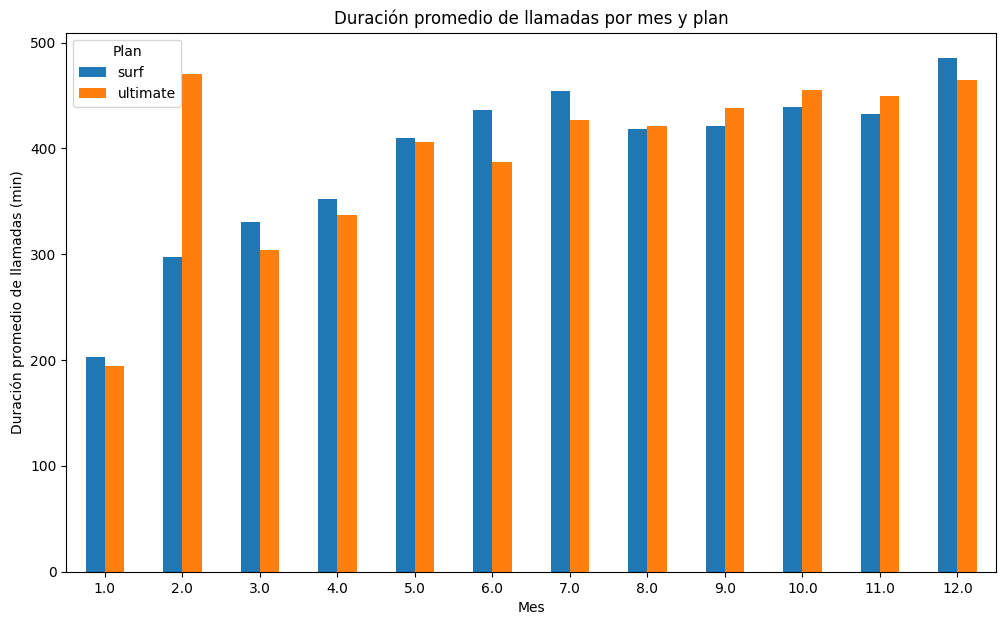

In [ ]:
# gráfico de barras agrupadas
pivot_data.plot(kind='bar', figsize=(12, 7))

# títulos y etiquetas
plt.title('Duración promedio de llamadas por mes y plan')
plt.xlabel('Mes')
plt.ylabel('Duración promedio de llamadas (min)')
plt.xticks(rotation=0)  # Para que las etiquetas de los meses estén horizontales
plt.legend(title='Plan')

# Muestra el gráfico
plt.show()

In [ ]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
pivot_data_num = df_total_to_pay.pivot_table(index='month',
                                        columns='plan_name',
                                        values='calls_duration_min',
                                        aggfunc='mean'
                           )

In [ ]:
# # Creamos un gráfico de barras
# pivot_data_num.plot(kind='bar', figsize=(12, 7))

# # Títulos y etiquetas
# plt.title('Comparación de Minutos de Llamadas por Mes y Plan')
# plt.xlabel('Mes')
# plt.ylabel('Duración Total de Llamadas (min)')
# plt.xticks(rotation=0)
# plt.legend(title='Plan')

# # Mostrmaos el gráfico
# plt.show()

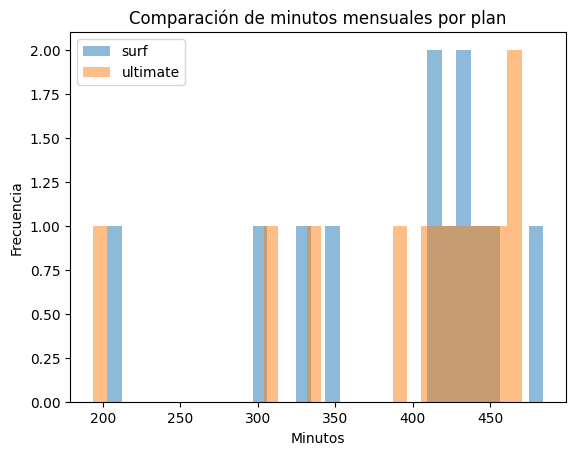

In [ ]:
# Extraemos la serie de datos para el plan 'surf'
surf_data = pivot_data_num['surf']

# Extraemos la serie de datos para el plan 'ultimate'
ultimate_data = pivot_data_num['ultimate']

# Trazamos el histograma para el plan 'surf'
surf_data.plot(kind='hist', bins=30, alpha=0.5, label='surf')

# Trazamos el histograma para el plan 'ultimate' en el mismo eje con diferente transparencia
ultimate_data.plot(kind='hist', bins=30, alpha=0.5, label='ultimate')

# Leyendas, títulos y etiquetas
plt.legend()
plt.title('Comparación de minutos mensuales por plan')
plt.xlabel('Minutos')
plt.ylabel('Frecuencia')

# Mostramos el gráfico
plt.show()


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [ ]:
# Calcula la media y la varianza de la duración mensual de llamadas.
print(f"Datos plan surf: \n\tMedia:{surf_data.mean():.1f}\n\tVar:{surf_data.var():.1f}\n\tMedian:{surf_data.median():.1f}\n")
print(f"Datos plan Ultimate: \n\tMedia:{ultimate_data.mean():.1f}\n\tVar:{ultimate_data.var():.1f}\n\tMedian:{ultimate_data.median():.1f}\n")

print(f"Datos planes : \n\tMedia:{surf_data.mean()-ultimate_data.mean():.1f}\n\tMedian:{surf_data.median()-ultimate_data.median():.1f}\n")

Datos plan surf: 
	Media:56201.9
	Var:2402963285.0
	Median:48142.0

Datos plan Ultimate: 
	Media:25827.0
	Var:521959518.5
	Median:21316.0

Datos planes : 
	Media:30374.9
	Median:26826.0



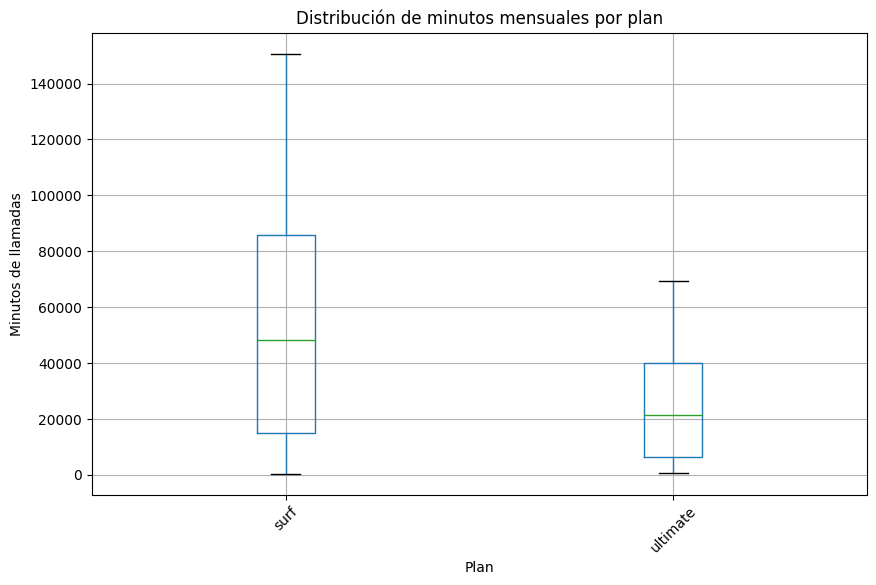

In [ ]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(10, 6))

# Trazamos el boxplot con colores personalizados
pivot_data_num.boxplot()

# Títulos y etiquetas
plt.title('Distribución de minutos mensuales por plan')
plt.xlabel('Plan')
plt.ylabel('Minutos de llamadas')

# Rotamos las etiquetas del eje x
plt.xticks(rotation=45)

# Añadimos una grilla
plt.grid(True)

# Mostramos el gráfico
plt.show()

In [ ]:
df_total_to_pay

,user_id,month,calls_duration_min,sms_count,internet_usage_MB,internet_usage_GB,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,extra_sms,extra_min,extra_GB,extra_usd,total_to_pay
0,1000,12.0,124.0,11.0,1901.47,2.0,ultimate,1000,30000.0,3000,70,7,0.01,0.01,30,0.0,0.0,0.0,0.0,70.0
1,1006,11.0,10.0,15.0,2068.37,3.0,ultimate,1000,30000.0,3000,70,7,0.01,0.01,30,0.0,0.0,0.0,0.0,70.0
2,1006,12.0,59.0,139.0,32118.82,32.0,ultimate,1000,30000.0,3000,70,7,0.01,0.01,30,0.0,0.0,2.0,14.0,84.0
3,1008,10.0,476.0,21.0,17106.99,17.0,ultimate,1000,30000.0,3000,70,7,0.01,0.01,30,0.0,0.0,0.0,0.0,70.0
4,1008,11.0,446.0,37.0,23676.72,24.0,ultimate,1000,30000.0,3000,70,7,0.01,0.01,30,0.0,0.0,0.0,0.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,NaN,NaN,NaN,NaN,NaN,surf,50,15000.0,500,20,10,0.03,0.03,15,0.0,0.0,0.0,0.0,20.0
2299,1307,NaN,NaN,NaN,NaN,NaN,surf,50,15000.0,500,20,10,0.03,0.03,15,0.0,0.0,0.0,0.0,20.0
2300,1319,NaN,NaN,NaN,NaN,NaN,surf,50,15000.0,500,20,10,0.03,0.03,15,0.0,0.0,0.0,0.0,20.0
2301,1378,NaN,NaN,NaN,NaN,NaN,surf,50,15000.0,500,20,10,0.03,0.03,15,0.0,0.0,0.0,0.0,20.0


In [ ]:
print(df_total_to_pay.groupby(['plan_name'])['extra_usd'].mean())

plan_name
surf        40.551729
ultimate     2.301105
Name: extra_usd, dtype: float64


In [ ]:
print(df_total_to_pay.groupby(['plan_name', 'month'])['total_to_pay'].mean().round(2))

plan_name  month
surf       1.0      20.00
           2.0      34.40
           3.0      45.94
           4.0      40.71
           5.0      47.63
           6.0      49.28
           7.0      62.67
           8.0      63.93
           9.0      58.27
           10.0     65.42
           11.0     58.00
           12.0     70.56
ultimate   1.0      70.00
           2.0      70.00
           3.0      74.67
           4.0      73.00
           5.0      70.72
           6.0      71.64
           7.0      71.90
           8.0      72.86
           9.0      72.03
           10.0     72.31
           11.0     71.71
           12.0     73.29
Name: total_to_pay, dtype: float64


In [ ]:
print(df_total_to_pay.groupby(['plan_name'])['total_to_pay'].mean().round(2))

plan_name
surf        60.55
ultimate    72.30
Name: total_to_pay, dtype: float64


In [ ]:
pivot_data = df_total_to_pay.pivot_table(index='month',
                                        columns='plan_name',
                                        values='total_to_pay',
                                        aggfunc='mean'
                           ).round(0)

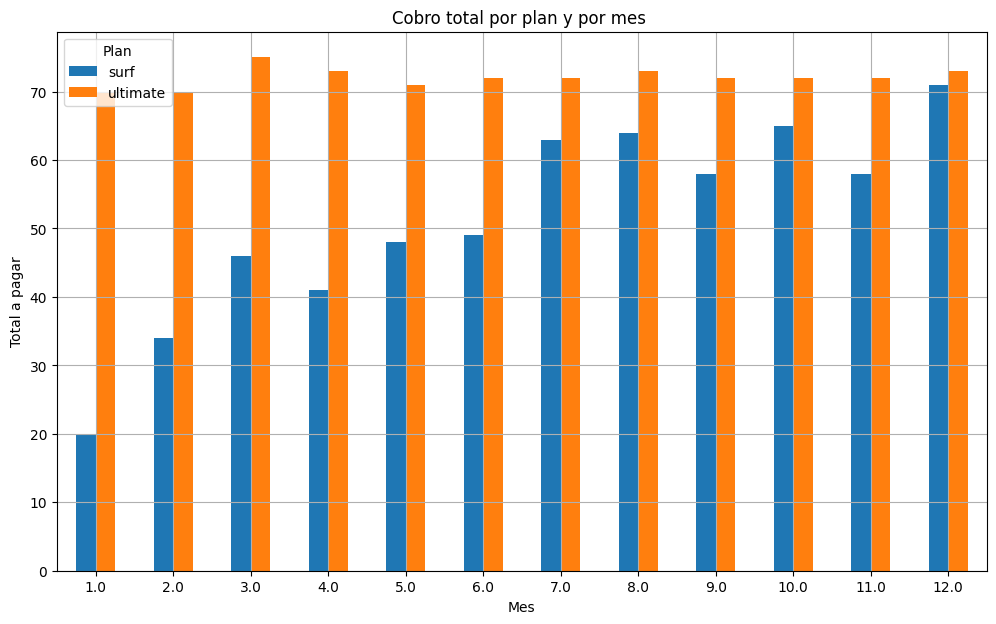

In [ ]:
# gráfico de barras agrupadas
pivot_data.plot(kind='bar', figsize=(12, 7))

# títulos y etiquetas
plt.title('Cobro total por plan y por mes ')
plt.xlabel('Mes')
plt.ylabel('Total a pagar')
plt.xticks(rotation=0)  # Para que las etiquetas de los meses estén horizontales
plt.legend(title='Plan')
plt.grid()

# Muestra el gráfico
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

**Sobre este apartado**

* A partir de los los gráficos y de los valores obtenidos al calcular la media y varianza, podemos observar que el mínimo de minutos para ambos planes se mantiene, sin embargo, el máximo para el caso de `surf` se distribuye ampliamente hacia valores más altos que los de últimate. Vemos también que existe una diferencia respecto de la media de ambos planes de 30374.9 minutos y una media en surf que se posiciona 26826.0 min más arriba que la de ultimate.

* Esto sugiere que los usuarios de surf tienen en promedio llamadas más largas y realizan más llamadas que los usuarios del plan ultimate de manera que hasta lo que se ha podido revisar los mayores ingresos están reportados por la cartera de clientes de ese plan.

* En función de esos datos podemos manejar la siguiente hipótesis *A la media de clientes del plan surf no les conviene cambiarse al plan ultimate porque aún cuando se exceden en los minutos la diferencia promedio de cobros extra no supera la diferencia existente entre el cobro actual de su plan y el plan ultimate.*

* La empresa debería considerar si el mayor precio base del plan "ultimate" compensa los menores cargos por exceso. Si los usuarios del plan "surf" aportan más ingresos a pesar de las menores tarifas por exceso de minutos debido al mayor uso y posiblemente al mayor número de abonados, entonces los recursos podrían asignarse mejor a la publicidad del plan "surf". Por el contrario, si el mayor precio base del plan "ultimate" compensa con creces el menor uso, entonces podría ser más rentable a pesar de tener menos cargos por exceso.


### Mensajes

In [ ]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
pivot_data_sms = df_total_to_pay.pivot_table(index='month',
                                        columns='plan_name',
                                        values='sms_count',
                                        aggfunc='mean'
                           )
print(pivot_data_sms)

plan_name       surf   ultimate
month                          
1.0        21.000000  20.666667
2.0        21.600000  25.166667
3.0        21.937500  34.714286
4.0        24.166667  28.937500
5.0        33.017857  44.333333
6.0        33.616438  36.289474
7.0        35.945055  41.212766
8.0        37.596774  47.929825
9.0        39.523179  45.901408
10.0       42.433862  46.977528
11.0       40.553097  47.601942
12.0       48.326772  53.936508


In [ ]:
# Calculamos el total de mensajes por mes para obtener el 100%
pivot_data_sms['total_messages'] = pivot_data_sms.sum(axis=1)
pivot_data_sms

plan_name,surf,ultimate,total_messages,surf_percent,ultimate_percent
month,,,,,
1.0,21.000000,20.666667,175.000000,25.200000,24.800000
2.0,21.600000,25.166667,190.300000,23.093371,26.906629
3.0,21.937500,34.714286,219.955357,19.361702,30.638298
4.0,24.166667,28.937500,209.312500,22.754021,27.245979
5.0,33.017857,44.333333,282.053571,21.342824,28.657176
6.0,33.616438,36.289474,259.717736,24.044060,25.955940
7.0,35.945055,41.212766,281.473463,23.293203,26.706797
8.0,37.596774,47.929825,306.579796,21.979580,28.020420
9.0,39.523179,45.901408,306.273762,23.133374,26.866626


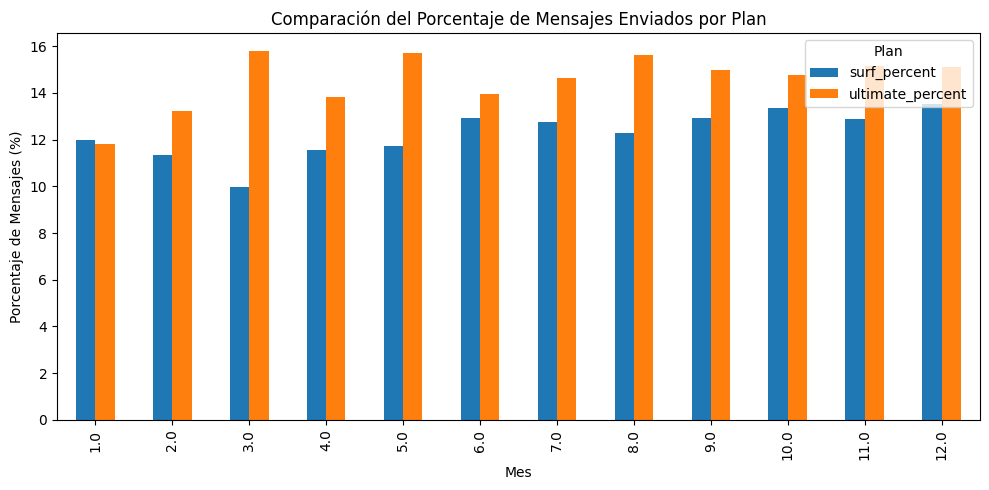

In [ ]:
# Calculamos el porcentaje de mensajes de cada plan por mes.
pivot_data_sms['surf_percent'] = (pivot_data_sms['surf'] / pivot_data_sms['total_messages']) * 100
pivot_data_sms['ultimate_percent'] = (pivot_data_sms['ultimate'] / pivot_data_sms['total_messages']) * 100

# Ahora, para un gráfico de barras más sencillo:
pivot_data_sms[['surf_percent', 'ultimate_percent']].plot(kind='bar', figsize=(10, 5))
plt.title('Comparación del Porcentaje de Mensajes Enviados por Plan')
plt.xlabel('Mes')
plt.ylabel('Porcentaje de Mensajes (%)')
plt.legend(title='Plan', loc='upper right')
plt.tight_layout()
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

**Sobre los sms**

- Evidentemente vemos que la media de mensajes enviado por los usuarios varia de acuerdo al plan  y de acuerdo al mes. Se aprecia que los usuarios del plan ultimate excende con creces y de manera consistente a lo largo de los meses, la cantidad de mensajes de texto.

- Puede ser esta una de las razones por las cuales los usuarios de este plan lo han preferido pues, la tarifa por sms extra es más baja y disponen de una mayor cantidad de mensajes a inicios de cada mes.

### Internet

In [ ]:
df_total_to_pay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2303 non-null   int64  
 1   month                  2293 non-null   float64
 2   calls_duration_min     2258 non-null   float64
 3   sms_count              1806 non-null   float64
 4   internet_usage_MB      2277 non-null   float64
 5   internet_usage_GB      2277 non-null   float64
 6   plan_name              2303 non-null   object 
 7   messages_included      2303 non-null   int64  
 8   mb_per_month_included  2303 non-null   float64
 9   minutes_included       2303 non-null   int64  
 10  usd_monthly_pay        2303 non-null   int64  
 11  usd_per_gb             2303 non-null   int64  
 12  usd_per_message        2303 non-null   float64
 13  usd_per_minute         2303 non-null   float64
 14  gb_per_month_included  2303 non-null   int64  
 15  extr

In [ ]:
# Comprara la cantidad de GB que tienden a utilizar cada mes los usuarios de cada plan

pivot_data_inet = df_total_to_pay.pivot_table(index='month',
                                        columns='plan_name',
                                        values='internet_usage_GB',
                                        aggfunc='mean'
                           )
print(pivot_data_inet)

plan_name       surf   ultimate
month                          
1.0         5.000000   7.250000
2.0        12.222222  17.285714
3.0        13.565217  18.416667
4.0        12.469388  16.333333
5.0        14.302632  16.862069
6.0        15.810526  15.425532
7.0        17.016667  16.491525
8.0        17.201258  17.845070
9.0        16.777202  17.011628
10.0       17.632479  17.885714
11.0       16.548043  17.118110
12.0       18.296530  18.397351


In [ ]:
surf_inet = df_total_to_pay[df_total_to_pay['plan_name'] == 'surf']['gb_per_month_included'].iloc[0]
ultimate_inet = df_total_to_pay[df_total_to_pay['plan_name'] == 'ultimate']['gb_per_month_included'].iloc[0]
print(surf_inet)
print(ultimate_inet)

15
30


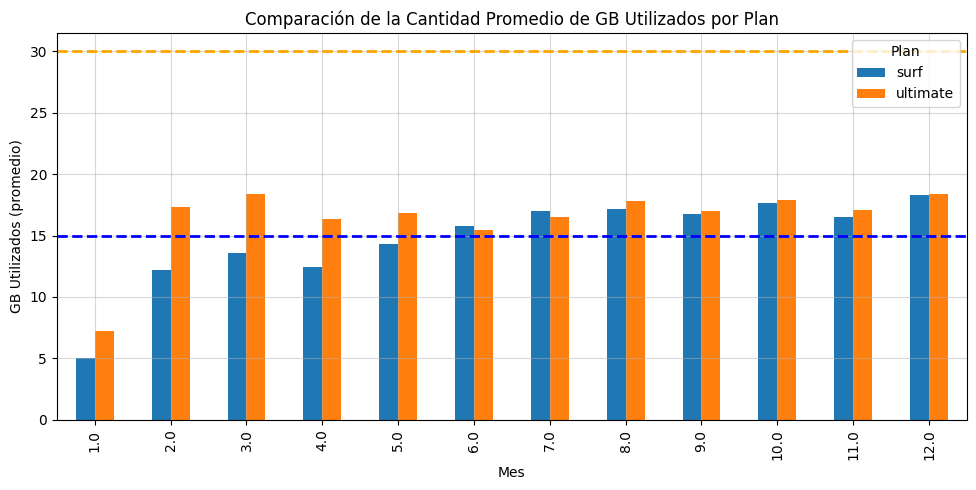

In [ ]:
# Creamos un gráfico de barras para comparar la cantidad promedio de GB utilizados por cada plan.
pivot_data_inet[['surf', 'ultimate']].plot(kind='bar', figsize=(10, 5))

plt.title('Comparación de la Cantidad Promedio de GB Utilizados por Plan')
plt.xlabel('Mes')
plt.ylabel('GB Utilizados (promedio)')

plt.legend(title='Plan', loc='upper right')
plt.tight_layout()

# Añade líneas horizontales al gráfico para marcar la cantidad de GB incluidos en cada plan.
plt.axhline(y=surf_inet, color='blue', linestyle='--', linewidth=2, label=f'GB Incluidos en Surf ({surf_inet})')
plt.axhline(y=ultimate_inet, color='orange', linestyle='--', linewidth=2, label=f'GB Incluidos en Ultimate ({ultimate_inet})')

plt.grid(alpha=0.5)
plt.show()


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

**Sobre inet**
 - Vemos a partir del gráfico que el consumo promedio en el caso de ambos planes varia, por cuanto se observa que los usuarios del plan ultimate consumen poco más de la mitad de la cuota de su plan, en tanto los usuarios de plan surf consumen cerca de un 20% más que la cuota de su plan.

 - Este gráfico prueba de alguna manera, que quienes tienden más a excederse de su cuota, reportando ganancias adicionales al costo base son los usuarios del plan surf, no obstante, falta trazar las ganancias totales reportadas y la masa total de usuarios y su evolución por cada mes.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [ ]:
# Calculamos la media real de los pagos para cada plan.
# Esto incluye el pago mensual más cualquier monto extra por excedentes.
mean_real_surf = (df_total_to_pay[df_total_to_pay['plan_name'] == 'surf']['total_to_pay'].mean())
mean_real_ultimate = (df_total_to_pay[df_total_to_pay['plan_name'] == 'ultimate']['total_to_pay'].mean())

# Calculamos la media general, que es la media de las medias reales de ambos planes.
mean_real_general = (mean_real_surf + mean_real_ultimate) / 2

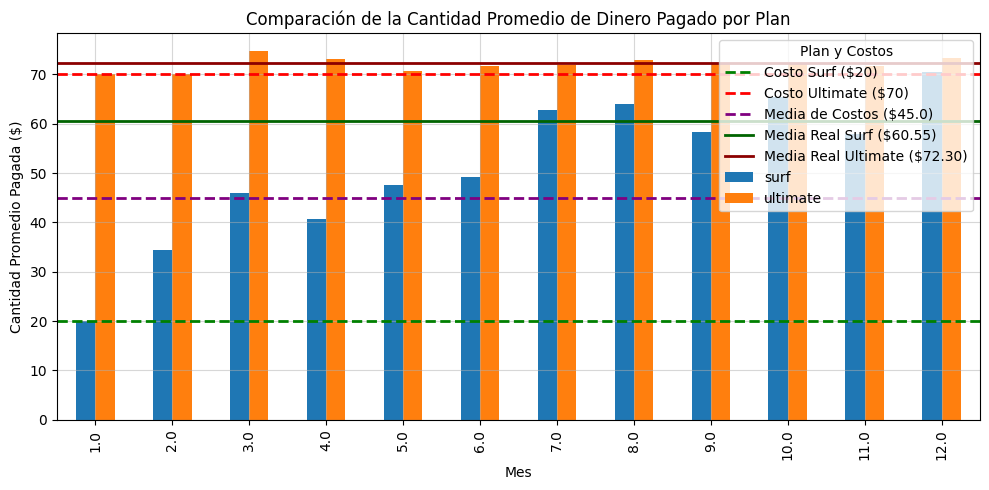

In [ ]:
# Ahora, trazamos las líneas en el gráfico.
pivot_data_incomes.plot(kind='bar', figsize=(10, 5))

# Líneas que representan el costo base de cada plan
plt.axhline(y=cost_surf, color='green', linestyle='--', linewidth=2, label=f'Costo Surf (${cost_surf})')
plt.axhline(y=cost_ultimate, color='red', linestyle='--', linewidth=2, label=f'Costo Ultimate (${cost_ultimate})')

# Línea que representa la media de los costos base de ambos planes
plt.axhline(y=mean_cost, color='purple', linestyle='--', linewidth=2, label=f'Media de Costos (${mean_cost})')

# Líneas que representan la media real de pagos para cada plan
plt.axhline(y=mean_real_surf, color='darkgreen', linestyle='-', linewidth=2, label=f'Media Real Surf (${mean_real_surf:.2f})')
plt.axhline(y=mean_real_ultimate, color='darkred', linestyle='-', linewidth=2, label=f'Media Real Ultimate (${mean_real_ultimate:.2f})')

# # Línea que representa la media general real de ambos planes
# plt.axhline(y=mean_real_general, color='purple', linestyle='-', linewidth=2, label=f'Media Real General (${mean_real_general:.2f})')

# Actualizamos el título y las etiquetas para reflejar estos cambios
plt.title('Comparación de la Cantidad Promedio de Dinero Pagado por Plan')
plt.xlabel('Mes')
plt.ylabel('Cantidad Promedio Pagada ($)')
plt.legend(title='Plan y Costos', loc='upper right')
plt.tight_layout()
plt.grid(alpha=0.5)
plt.show()


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

**Sobre los ingresos**

- A partir del gráfico podemos ver que los usuarios del plan "surf" incurren en más costos adicionales, lo que sugiere que este plan podría tener límites de uso más bajos o tarifas por uso adicional más altas en comparación con el plan "ultimate".
- Vemos también que la media real de costos del plan surf excede considerablemente lo que proyecta la tarifa original de manera que podemos suponer que dentro de los clientes surf, hay quienes podrian hacer la transición a la tarifa ultimate.
- Del mismo modo vemos que mientras que la tarifa surf es más impredecible, la tarifa ultimate tiene una variación del orden del 3%, marginal comparada con la variación del plan surf.

- Finalmente vemos que la media de ambos planes está en torno a los 45 usd por lo que podría ser una opción sugerir tarifas intermedias para usuarios del plan surf impulsandolos a tener una tarifa simétrica con beneficios compartidos entre ambas tarifas.

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [ ]:
# Prueba las hipótesis
# Ho = No existe diferencia entre los ingresos promedio procedentes de los usuarios de los planes de llamada ultimate y surf
# Ha = Sí existe diferencia entre los ingresos promedio procedentes de los usuarios de los planes de llamada ultimate y surf

In [ ]:
# Previamente definimos
mean_real_surf = df_total_to_pay[df_total_to_pay['plan_name'] == 'surf']['total_to_pay']
mean_real_ultimate = df_total_to_pay[df_total_to_pay['plan_name'] == 'ultimate']['total_to_pay']

In [ ]:
alpha = .05# la significancia estadística crítica (umbral)# realizar una prueba
results = st.ttest_ind(mean_real_surf,mean_real_ultimate)

# imprimir el valor p resultante
print('valor p: ', results.pvalue)

# comparar el valor p con el umbral

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  1.724423314124219e-08
Rechazamos la hipótesis nula


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

In [ ]:
df_total_to_pay_location = pd.merge(df_total_to_pay, df_users, on = 'user_id', how= 'outer')

In [ ]:
df_total_to_pay_location

,user_id,month,calls_duration_min,sms_count,internet_usage_MB,internet_usage_GB,plan_name,messages_included,mb_per_month_included,minutes_included,...,extra_usd,total_to_pay,first_name,last_name,age,city,reg_date,plan,churn_date,age_category
0,1000,12.0,124.0,11.0,1901.47,2.0,ultimate,1000,30000.0,3000,...,0.0,70.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Mature
1,1006,11.0,10.0,15.0,2068.37,3.0,ultimate,1000,30000.0,3000,...,0.0,70.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,Seniors
2,1006,12.0,59.0,139.0,32118.82,32.0,ultimate,1000,30000.0,3000,...,14.0,84.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,Seniors
3,1008,10.0,476.0,21.0,17106.99,17.0,ultimate,1000,30000.0,3000,...,0.0,70.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,Mature
4,1008,11.0,446.0,37.0,23676.72,24.0,ultimate,1000,30000.0,3000,...,0.0,70.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,Mature
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,NaN,NaN,NaN,NaN,NaN,surf,50,15000.0,500,...,0.0,20.0,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",2018-10-26,surf,NaT,Seniors
2299,1307,NaN,NaN,NaN,NaN,NaN,surf,50,15000.0,500,...,0.0,20.0,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,NaT,Youth
2300,1319,NaN,NaN,NaN,NaN,NaN,surf,50,15000.0,500,...,0.0,20.0,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,NaT,Youth
2301,1378,NaN,NaN,NaN,NaN,NaN,surf,50,15000.0,500,...,0.0,20.0,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,NaT,Youth


In [ ]:
df_users_NY_NJ = df_total_to_pay_location[df_total_to_pay_location['city'].str.contains("NY-NJ")]['total_to_pay']
df_users_else = df_total_to_pay_location[~df_total_to_pay_location['city'].str.contains("NY-NJ")]['total_to_pay']

In [ ]:
df_users_NY_NJ.info()

<class 'pandas.core.series.Series'>
Int64Index: 378 entries, 30 to 2274
Series name: total_to_pay
Non-Null Count  Dtype  
--------------  -----  
378 non-null    float64
dtypes: float64(1)
memory usage: 5.9 KB


In [ ]:
df_users_else.info()

<class 'pandas.core.series.Series'>
Int64Index: 1925 entries, 0 to 2302
Series name: total_to_pay
Non-Null Count  Dtype  
--------------  -----  
1925 non-null   float64
dtypes: float64(1)
memory usage: 30.1 KB


[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [ ]:
# Prueba las hipótesis
#Ho = el ingreso promedio de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones
#Ha = el ingreso promedio de los usuarios del área NY-NJ no es igual al de los usuarios de otras regiones

alpha = .05# la significancia estadística crítica (umbral)# realizar una prueba
results = st.ttest_ind(df_users_NY_NJ, df_users_else)

# imprimir el valor p resultante
print('valor p: ', results.pvalue)

# comparar el valor p con el umbral

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  0.04974528277407644
Rechazamos la hipótesis nula


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Basándome en los gráficos proporcionados y los resultados de las pruebas de hipótesis podemos concluir que:

1. **Diferencia de Ingresos entre Planes:**
   - Existe una diferencia estadísticamente significativa en los ingresos promedio generados por los usuarios de los planes 'surf' y 'ultimate'. Los usuarios del plan 'ultimate' generan, en promedio, más ingresos que los del plan 'surf' tla como se vio en el gráfico `Comparación de la Cantidad Promedio de Dinero Pagado por Plan`.

2. **Comportamiento de Uso:**
   - Los usuarios de ambos planes consumen una cantidad similar de GB de datos, aunque los del plan 'surf' tienden a usar algunos puntos porcentuales por sobre los del ultimate.
   - Los usuarios del plan 'surf' tienden a incurrir en cargos adicionales más significativos que los del plan 'ultimate', lo que puede indicar que el plan 'surf' tiene límites más bajos o tarifas adicionales más altas por servicios fuera del paquete básico.
   - En términos de mensajes, los usuarios del plan 'surf' envían un porcentaje más alto en comparación con los del plan 'ultimate'.

3. **Variabilidad en el Uso de Llamadas:**
   - Hay una variabilidad considerable en los minutos de llamadas utilizados por los suscriptores del plan 'surf' en comparación con el plan 'ultimate', lo que podría reflejar diferencias en los patrones de uso o en la oferta del plan. Para incentivar la transición al plan ultimate, podria subirse el costo adicional por minuto extra ya que así seria seguro que se pasarán del monto base (y medio) de su plan.

4. **Preferencias Regionales:**
   - La prueba de hipótesis sugiere que los ingresos promedio de los usuarios en el área de NY-NJ son diferentes de los de otras regiones, lo que puede indicar diferencias regionales en el uso del servicio o en la demografía de los usuarios.

5. **Implicaciones para la Empresa:**
   - Los hallazgos podrían ser utilizados por la empresa para revisar la estructura de precios y las ofertas de planes. Por ejemplo, se podría considerar ajustar los límites del plan 'surf' o revisar los cargos por servicios adicionales para mejorar la satisfacción del cliente y optimizar los ingresos.
   - La empresa también podría investigar más a fondo las preferencias regionales y el comportamiento de uso para ofrecer promociones personalizadas o ajustar sus estrategias de marketing.

6. **Consideraciones de Negocio:**
   - A pesar de los resultados estadísticos, las decisiones empresariales deben considerar también el contexto del mercado, la satisfacción del cliente, la retención y la adquisición de nuevos usuarios, no solo las diferencias en los ingresos promedio.

7. **Recomendaciones de Análisis Futuro:**
   - Sería beneficioso realizar análisis adicionales para entender las causas subyacentes de los cargos adicionales, como el desglose de los costos por servicios adicionales y el uso en horas pico.
   - Además, se podrían estudiar las diferencias en el comportamiento de uso a lo largo del tiempo para detectar tendencias o cambios en las preferencias de los clientes.
   - Así también, podría evaluarse qué segmentos etareos se concentran en un determinado plan y así tener un publico objetivo al cual apuntar nuestra publicidad.

Todo esto señala que, tal como indicaron las pruebas, hay diferencias significativas en cómo los diferentes planes y regiones contribuyen a los ingresos de la empresa. Estos hallazgos deben ser considerados en la estrategia de precios y en el diseño de planes de la empresa para maximizar la rentabilidad y la satisfacción del clietne.